In [1]:
from google.colab import files
uploaded = files.upload()


Saving water_dataX.csv to water_dataX.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Replace 'filename.csv' with the name of your CSV file
df = pd.read_csv('water_dataX.csv', encoding='latin-1')


In [4]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [5]:
df.shape

(1991, 12)

In [6]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [7]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [8]:
empty_spaces = df.isin([' ']) | df.isnull()
# Check for empty spaces (spaces)
# You can also check for other types of empty values such as empty strings (''), NaNs, etc.
# For example: empty_spaces = df.isnull() | df.isin([''])

# Print the count of empty spaces in each column
print("Count of empty spaces in each column:")
print(empty_spaces.sum())

Count of empty spaces in each column:
STATION CODE                         0
LOCATIONS                            0
STATE                                0
Temp                                 4
D.O. (mg/l)                          0
PH                                   0
CONDUCTIVITY (µmhos/cm)              0
B.O.D. (mg/l)                        3
NITRATENAN N+ NITRITENANN (mg/l)     5
FECAL COLIFORM (MPN/100ml)          13
TOTAL COLIFORM (MPN/100ml)Mean      11
year                                 0
dtype: int64


In [9]:
# Check for empty spaces (spaces) and NaN values
empty_spaces = df.applymap(lambda x: isinstance(x, str) and x.isspace() or pd.isnull(x))

# Print the count of empty spaces in each column
print("Count of empty spaces in each column before cleaning:")
print(empty_spaces.sum())

# Remove rows with empty spaces
cleaned_df = df[~empty_spaces.any(axis=1)]

# Print the count of empty spaces in each column after cleaning
print("\nCount of empty spaces in each column after cleaning:")
print(cleaned_df.applymap(lambda x: isinstance(x, str) and x.isspace() or pd.isnull(x)).sum())

# Now cleaned_df contains the data with empty spaces removed
# You can use cleaned_df for further analysis or save it to a new file if needed


Count of empty spaces in each column before cleaning:
STATION CODE                         0
LOCATIONS                            0
STATE                                0
Temp                                 4
D.O. (mg/l)                          0
PH                                   0
CONDUCTIVITY (µmhos/cm)              0
B.O.D. (mg/l)                        3
NITRATENAN N+ NITRITENANN (mg/l)     5
FECAL COLIFORM (MPN/100ml)          13
TOTAL COLIFORM (MPN/100ml)Mean      11
year                                 0
dtype: int64

Count of empty spaces in each column after cleaning:
STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean 

In [10]:
columns_to_remove = ['STATION CODE', 'LOCATIONS', 'STATE', 'year']  # Replace with the actual column names you want to remove

# Drop the specified columns
cleaned_df.drop(columns=columns_to_remove, inplace=True)

<ipython-input-10-ca0211f885b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=columns_to_remove, inplace=True)


In [11]:
cleaned_df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203,NAN,0.1,11,27
1,29.8,5.7,7.2,189,2,0.2,4953,8391
2,29.5,6.3,6.9,179,1.7,0.1,3243,5330
3,29.7,5.8,6.9,64,3.8,0.5,5382,8443
4,29.5,5.8,7.3,83,1.9,0.4,3428,5500


In [12]:
cleaned_df.replace('NAN', pd.NA, inplace=True)

# Now you can use .isna() to check for missing values
nan_counts = cleaned_df.isna().sum()

# Print the number of NaN values for each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Temp                                 88
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        40
NITRATENAN N+ NITRITENANN (mg/l)    220
FECAL COLIFORM (MPN/100ml)          303
TOTAL COLIFORM (MPN/100ml)Mean      121
dtype: int64


<ipython-input-12-47aa8061fe16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace('NAN', pd.NA, inplace=True)


In [13]:
cleaned_df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203,<NA>,0.1,11,27
1,29.8,5.7,7.2,189,2,0.2,4953,8391
2,29.5,6.3,6.9,179,1.7,0.1,3243,5330
3,29.7,5.8,6.9,64,3.8,0.5,5382,8443
4,29.5,5.8,7.3,83,1.9,0.4,3428,5500


In [14]:
cleaned_df.isna().sum()

Temp                                 88
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        40
NITRATENAN N+ NITRITENANN (mg/l)    220
FECAL COLIFORM (MPN/100ml)          303
TOTAL COLIFORM (MPN/100ml)Mean      121
dtype: int64

In [15]:
# Corrected code
columns_to_convert = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)',
                      'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)',
                      'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean']

cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].fillna(0)
cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].astype(float)

<ipython-input-15-b0486730ffb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].fillna(0)
<ipython-input-15-b0486730ffb7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].astype(float)


In [16]:
cleaned_df.dtypes

Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

In [17]:
cleaned_df.head(20)

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,0.0,0.1,11.0,27.0
1,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0
2,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0
3,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0
4,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0
5,30.0,5.5,7.4,81.0,1.5,0.1,2853.0,4049.0
6,29.2,6.1,6.7,308.0,1.4,0.3,3355.0,5672.0
7,29.6,6.4,6.7,414.0,1.0,0.2,6073.0,9423.0
8,30.0,6.4,7.6,305.0,2.2,0.1,3478.0,4990.0
9,30.1,6.3,7.6,77.0,2.3,0.1,2606.0,4301.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [19]:
for column in columns_to_convert:
    if (cleaned_df[column] == 0.0).any():
        # Split dataset into train and test sets
        train_data = cleaned_df[cleaned_df[column] != 0.0]  # Rows without missing values or filled with 0.0 in the current column
        test_data = cleaned_df[cleaned_df[column] == 0.0]  # Rows with missing values filled with 0.0 in the current column

        if not test_data.empty:
            # Choose relevant features and target variable
            X_train = train_data.drop([column], axis=1)  # Input features for training (excluding current column)
            y_train = train_data[column]  # Target variable for training

            X_test = test_data.drop([column], axis=1)  # Input features for prediction (excluding current column)

            # Choose a model and train it
            model = RandomForestRegressor() # Example: Random Forest Regressor
            model.fit(X_train, y_train)

            # Predict missing values
            predicted_values = model.predict(X_test)

            # Impute missing values
            test_data[column] = predicted_values

            # Replace 0.0 with imputed values
            cleaned_df.loc[test_data.index, column] = predicted_values

# Print the DataFrame with imputed values
print(cleaned_df.head())

<ipython-input-19-c915c754c6ae>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column] = predicted_values
<ipython-input-19-c915c754c6ae>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[test_data.index, column] = predicted_values
<ipython-input-19-c915c754c6ae>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

   Temp  D.O. (mg/l)   PH  CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
0  30.6          6.7  7.5                    203.0         2.7453   
1  29.8          5.7  7.2                    189.0         2.0000   
2  29.5          6.3  6.9                    179.0         1.7000   
3  29.7          5.8  6.9                     64.0         3.8000   
4  29.5          5.8  7.3                     83.0         1.9000   

   NITRATENAN N+ NITRITENANN (mg/l)  FECAL COLIFORM (MPN/100ml)  \
0                               0.1                        11.0   
1                               0.2                      4953.0   
2                               0.1                      3243.0   
3                               0.5                      5382.0   
4                               0.4                      3428.0   

   TOTAL COLIFORM (MPN/100ml)Mean  
0                            27.0  
1                          8391.0  
2                          5330.0  
3                          8443.0  
4 

<ipython-input-19-c915c754c6ae>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column] = predicted_values
<ipython-input-19-c915c754c6ae>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[test_data.index, column] = predicted_values


In [20]:
cleaned_df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,2.7453,0.1,11.0,27.0
1,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0
2,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0
3,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0
4,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0


In [21]:
num_zeros = (cleaned_df == 0.0).sum()

# Print the count of 0.0 values in each column
print(num_zeros)

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64


In [22]:
from scipy import stats

In [23]:
columns_to_check = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)',
                      'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)',
                      'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean']

In [24]:
outlier_df = cleaned_df.copy()

In [25]:
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

In [26]:
((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).sum()

Temp                                114
D.O. (mg/l)                         123
PH                                  106
CONDUCTIVITY (µmhos/cm)             265
B.O.D. (mg/l)                       273
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          308
TOTAL COLIFORM (MPN/100ml)Mean      300
dtype: int64

In [27]:
def iqr_cap(df, cols):
    for i in cols:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_b = q3 + 1.5*iqr
        lower_l = q1 - 1.5*iqr

        df[i] = np.where(df[i] > upper_b, upper_b, np.where(df[i] < lower_l, lower_l, df[i]))
    return df

In [28]:
iqr_cap(outlier_df, columns_to_check)

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.600,6.7,7.5,203.0,2.7453,0.10000,11.00000,27.00
1,29.800,5.7,7.2,189.0,2.0000,0.20000,1809.92500,4417.25
2,29.500,6.3,6.9,179.0,1.7000,0.10000,1809.92500,4417.25
3,29.700,5.8,6.9,64.0,3.8000,0.50000,1809.92500,4417.25
4,29.500,5.8,7.3,83.0,1.9000,0.40000,1809.92500,4417.25
...,...,...,...,...,...,...,...,...
1986,26.873,7.9,8.9,7.2,2.7000,0.51800,0.51800,202.00
1987,29.000,7.5,8.9,6.3,2.6000,0.15500,0.15500,315.00
1988,28.000,7.6,8.9,6.2,1.2000,0.76853,7.43713,570.00
1989,28.000,7.7,8.9,6.5,1.3000,0.73992,17.77726,562.00


In [29]:
((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).sum()
#checking done for the outlier and correction done

Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64

In [30]:
# Set the pH range as a list
ph_range = [6.5, 8.5]

# Set the DO and BOD thresholds as floats
do_threshold = float(6.0)
bod_threshold = float(2.0)
nitr_threshold = float(1.0)

# Function to classify water quality
def classify_water_quality(row):
    ph_value = row['PH']
    do_value = row['D.O. (mg/l)']
    bod_value = row['B.O.D. (mg/l)']
    nat_value = row['NITRATENAN N+ NITRITENANN (mg/l)']

    if ph_range[0] <= ph_value <= ph_range[1] and do_value >= do_threshold and bod_value <= bod_threshold and nat_value <= nitr_threshold:
        return 'Good'
    else:
        return 'Poor'

# Classify the water quality in the outlier_df DataFrame
outlier_df['Water Quality'] = outlier_df.apply(classify_water_quality, axis=1)

In [31]:
outlier_df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,Water Quality
0,30.6,6.7,7.5,203.0,2.7453,0.1,11.000,27.00,Poor
1,29.8,5.7,7.2,189.0,2.0000,0.2,1809.925,4417.25,Poor
2,29.5,6.3,6.9,179.0,1.7000,0.1,1809.925,4417.25,Good
3,29.7,5.8,6.9,64.0,3.8000,0.5,1809.925,4417.25,Poor
4,29.5,5.8,7.3,83.0,1.9000,0.4,1809.925,4417.25,Poor


In [32]:
# Count the number of rows for each water quality category
quality_counts = outlier_df['Water Quality'].value_counts()

# Print the counts
print("Counts of Water Quality Categories:")
print(quality_counts)

Counts of Water Quality Categories:
Poor    1362
Good     612
Name: Water Quality, dtype: int64


In [33]:
highest_values = outlier_df.max()

# Find the lowest value in each column
lowest_values = outlier_df.min()

print("Highest values in each column:")
print(highest_values)

print("\nLowest values in each column:")
print(lowest_values)

Highest values in each column:
Temp                                   33.55
D.O. (mg/l)                             9.15
PH                                       8.9
CONDUCTIVITY (µmhos/cm)              1402.75
B.O.D. (mg/l)                            7.7
NITRATENAN N+ NITRITENANN (mg/l)    3.918437
FECAL COLIFORM (MPN/100ml)          1809.925
TOTAL COLIFORM (MPN/100ml)Mean       4417.25
Water Quality                           Poor
dtype: object

Lowest values in each column:
Temp                                19.55
D.O. (mg/l)                          3.95
PH                                    5.7
CONDUCTIVITY (µmhos/cm)               0.4
B.O.D. (mg/l)                         0.1
NITRATENAN N+ NITRITENANN (mg/l)     0.01
FECAL COLIFORM (MPN/100ml)            0.1
TOTAL COLIFORM (MPN/100ml)Mean        2.0
Water Quality                        Good
dtype: object


In [34]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1974 non-null   float64
 1   D.O. (mg/l)                       1974 non-null   float64
 2   PH                                1974 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1974 non-null   float64
 4   B.O.D. (mg/l)                     1974 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1974 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1974 non-null   float64
 7   TOTAL COLIFORM (MPN/100ml)Mean    1974 non-null   float64
 8   Water Quality                     1974 non-null   object 
dtypes: float64(8), object(1)
memory usage: 218.8+ KB


In [35]:
cat_cols = outlier_df.select_dtypes(include=["object"]).columns
cat_cols

Index(['Water Quality'], dtype='object')

In [36]:
# encode the Categorical Variable
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [37]:
outlier_df = MultiColumnLabelEncoder(columns= cat_cols).fit_transform(outlier_df)

In [38]:
outlier_df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,Water Quality
0,30.6,6.7,7.5,203.0,2.7453,0.1,11.000,27.00,1
1,29.8,5.7,7.2,189.0,2.0000,0.2,1809.925,4417.25,1
2,29.5,6.3,6.9,179.0,1.7000,0.1,1809.925,4417.25,0
3,29.7,5.8,6.9,64.0,3.8000,0.5,1809.925,4417.25,1
4,29.5,5.8,7.3,83.0,1.9000,0.4,1809.925,4417.25,1


In [39]:
y = outlier_df.iloc[:, -1]
x = outlier_df.iloc[:,0:8]

In [40]:
x

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.600,6.7,7.5,203.0,2.7453,0.10000,11.00000,27.00
1,29.800,5.7,7.2,189.0,2.0000,0.20000,1809.92500,4417.25
2,29.500,6.3,6.9,179.0,1.7000,0.10000,1809.92500,4417.25
3,29.700,5.8,6.9,64.0,3.8000,0.50000,1809.92500,4417.25
4,29.500,5.8,7.3,83.0,1.9000,0.40000,1809.92500,4417.25
...,...,...,...,...,...,...,...,...
1986,26.873,7.9,8.9,7.2,2.7000,0.51800,0.51800,202.00
1987,29.000,7.5,8.9,6.3,2.6000,0.15500,0.15500,315.00
1988,28.000,7.6,8.9,6.2,1.2000,0.76853,7.43713,570.00
1989,28.000,7.7,8.9,6.5,1.3000,0.73992,17.77726,562.00


In [41]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)

In [42]:
fs.fit(x, y)

SelectKBest(k=5)

In [43]:
fs.get_support().sum()

5

In [44]:
import math

In [45]:
def list_cell(x):
    return[math.ceil(i) for i in x]

In [46]:
print("P_values:")
print(np.round(fs.pvalues_, 4))
print("F Values :")
print(fs.scores_)

P_values:
[0.     0.     0.     0.     0.     0.     0.6193 0.5661]
F Values :
[6.12958743e+01 1.76301957e+02 5.84783273e+01 5.97421702e+01
 6.19150376e+02 4.57385349e+02 2.46870290e-01 3.29438139e-01]


In [47]:
list_cell(fs.scores_)

[62, 177, 59, 60, 620, 458, 1, 1]

In [48]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(5,columns="Score"))

                     Input_Features       Score  P_Value
4                     B.O.D. (mg/l)  619.150376      0.0
5  NITRATENAN N+ NITRITENANN (mg/l)  457.385349      0.0
1                       D.O. (mg/l)  176.301957      0.0
0                              Temp   61.295874      0.0
3           CONDUCTIVITY (µmhos/cm)   59.742170      0.0


In [49]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1990
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1974 non-null   float64
 1   D.O. (mg/l)                       1974 non-null   float64
 2   PH                                1974 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1974 non-null   float64
 4   B.O.D. (mg/l)                     1974 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1974 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1974 non-null   float64
 7   TOTAL COLIFORM (MPN/100ml)Mean    1974 non-null   float64
 8   Water Quality                     1974 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 218.8 KB


In [50]:
cols_to_remove = ['CONDUCTIVITY (µmhos/cm)', 'Temp', 'PH', 'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean']  # Replace with the actual column names you want to remove

# Drop the specified columns
outlier_df.drop(columns=cols_to_remove, inplace=True)

In [51]:
outlier_df.head()

,D.O. (mg/l),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Water Quality
0,6.7,2.7453,0.1,1
1,5.7,2.0000,0.2,1
2,6.3,1.7000,0.1,0
3,5.8,3.8000,0.5,1
4,5.8,1.9000,0.4,1


In [52]:
from sklearn.preprocessing import StandardScaler

# Select the features for StandardScaler
selected_features = ['B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 'D.O. (mg/l)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected features
scaler.fit(outlier_df[selected_features])

# Transform the selected features
outlier_df[selected_features] = scaler.transform(outlier_df[selected_features])

# Now df[selected_features] contains the scaled features


In [53]:
outlier_df.head()

,D.O. (mg/l),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Water Quality
0,0.223701,-0.054901,-0.878773,1
1,-0.685455,-0.370596,-0.800870,1
2,-0.139961,-0.497670,-0.878773,0
3,-0.594540,0.391850,-0.567161,1
4,-0.594540,-0.412954,-0.645064,1


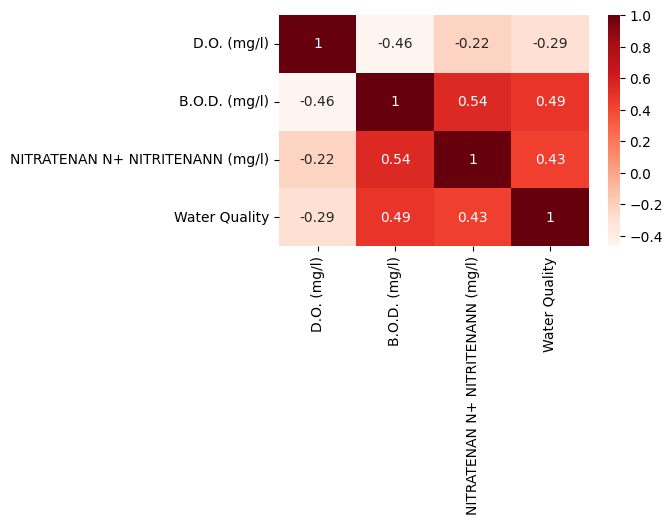

In [54]:
plt.figure(figsize=(5,3))
cor = outlier_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
final_df = outlier_df.copy()

In [56]:
final_df

,D.O. (mg/l),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Water Quality
0,0.223701,-0.054901,-0.878773,1
1,-0.685455,-0.370596,-0.800870,1
2,-0.139961,-0.497670,-0.878773,0
3,-0.594540,0.391850,-0.567161,1
4,-0.594540,-0.412954,-0.645064,1
...,...,...,...,...
1986,1.314689,-0.074089,-0.553138,1
1987,0.951027,-0.116447,-0.835926,1
1988,1.041942,-0.709461,-0.357968,1
1989,1.132858,-0.667103,-0.380256,1


In [57]:
f_y = final_df.iloc[:,-1]
f_x = final_df.iloc[:,0:3]

In [58]:
f_x

,D.O. (mg/l),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l)
0,0.223701,-0.054901,-0.878773
1,-0.685455,-0.370596,-0.800870
2,-0.139961,-0.497670,-0.878773
3,-0.594540,0.391850,-0.567161
4,-0.594540,-0.412954,-0.645064
...,...,...,...
1986,1.314689,-0.074089,-0.553138
1987,0.951027,-0.116447,-0.835926
1988,1.041942,-0.709461,-0.357968
1989,1.132858,-0.667103,-0.380256


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=2, random_state=2),
    'svc': SVC(kernel='linear', C=2.0)
}

In [72]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('---')

Logistic Regression Metrics:
Accuracy: 0.87
Precision: 0.84
Recall: 0.85
F1 Score: 0.85
---
Decision Tree Metrics:
Accuracy: 0.94
Precision: 0.92
Recall: 0.95
F1 Score: 0.93
---
Random Forest Metrics:
Accuracy: 0.94
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
---
svc Metrics:
Accuracy: 0.87
Precision: 0.86
Recall: 0.85
F1 Score: 0.86
---


In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
model = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=2)


In [76]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.90566038 0.89811321 0.9280303  0.89772727 0.9280303 ]
Mean CV score: 0.9115122927387077
Standard deviation of CV scores: 0.013780395511664167


In [78]:
final_model = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=2)

In [79]:
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=2)

In [80]:
y_pred = final_model.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9355828220858896


In [85]:
# Define a function to interactively collect user input and make predictions
def predict_water_quality(model):
    # Ask the user to input values for features
    temperature = float(input("Enter temperature (°C): "))
    dissolved_oxygen = float(input("Enter dissolved oxygen level (mg/l): "))
    pH = float(input("Enter pH value: "))
    conductivity = float(input("Enter conductivity (µmhos/cm): "))
    bod = float(input("Enter B.O.D. (mg/l): "))
    nitrates_nitrites = float(input("Enter nitrates + nitrites (mg/l): "))
    fecal_coliform = float(input("Enter fecal coliform (MPN/100ml): "))
    total_coliform = float(input("Enter total coliform (MPN/100ml): "))

    # Create a list of input features
    features = [[temperature, dissolved_oxygen, pH, conductivity, bod, nitrates_nitrites, fecal_coliform, total_coliform]]

    # Use the model to make predictions
    prediction = model.predict(features)

    # Map predicted numerical values to labels
    water_quality = "good" if prediction[0] == 1 else "poor"

    # Print the predicted water quality
    print("Predicted water quality:", water_quality)

# Call the function with your trained model
predict_water_quality(final_model)


Enter temperature (°C): 34
Enter dissolved oxygen level (mg/l): 2.56
Enter pH value: 6.54
Enter conductivity (µmhos/cm): 342
Enter B.O.D. (mg/l): 0.32
Enter nitrates + nitrites (mg/l): 0.03
Enter fecal coliform (MPN/100ml): 184.876
Enter total coliform (MPN/100ml): 237.89
Predicted water quality: good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
